# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [129]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [130]:
def read_data(path):
    data = pd.read_csv(path)
    data = data.drop(columns=['name'])
    data_Y = data['status']
    data_X = data.drop(columns=['status'])
    return data_X, data_Y

data_X, data_Y = read_data("parkinsons.csv")

Let's see what we have loaded.

In [131]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [132]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data? ***22***
* Are the attributes on the common scale? ***Nie***
* Are observations equally distributed for sick and healthy people? ***Nie***

Plot the histogram of the assigned class and analyse the distribution.


In [133]:
data_X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [134]:
print("1: " + str(list(data_Y).count(1)))
print("0: " + str(list(data_Y).count(0)))

1: 147
0: 48


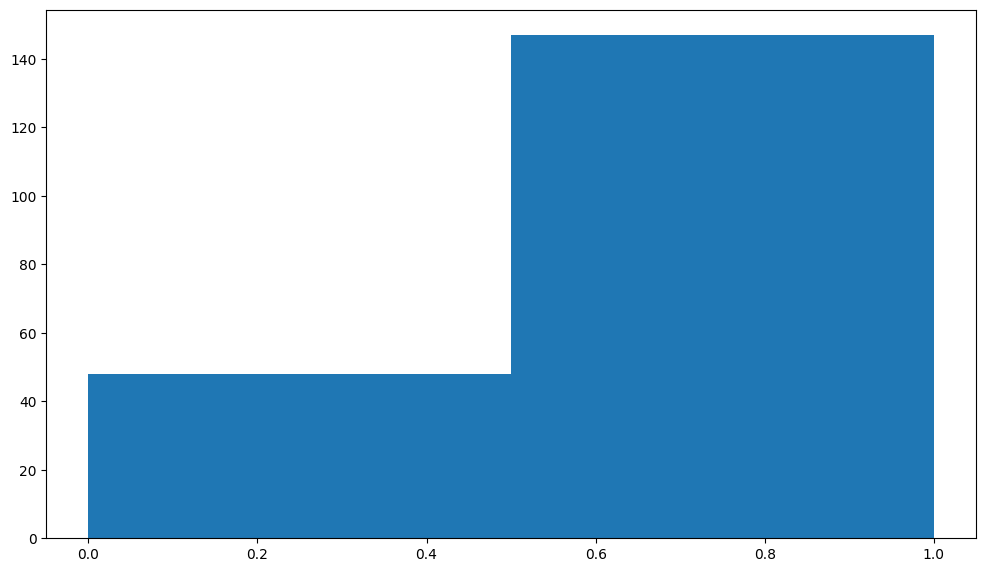

In [135]:
plt.hist(data_Y, bins = 2);

Plot the histograms of the first 5 attributes. 

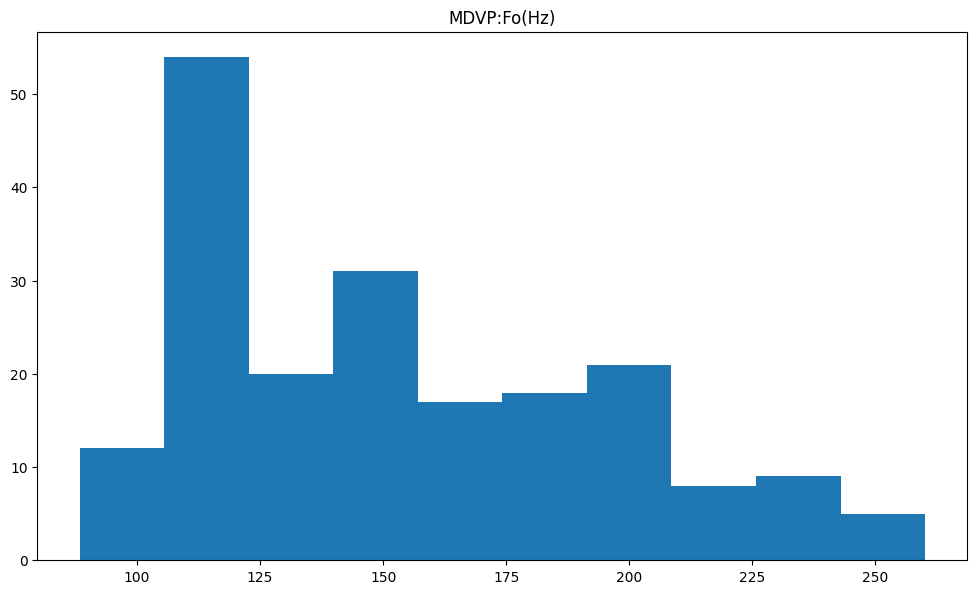

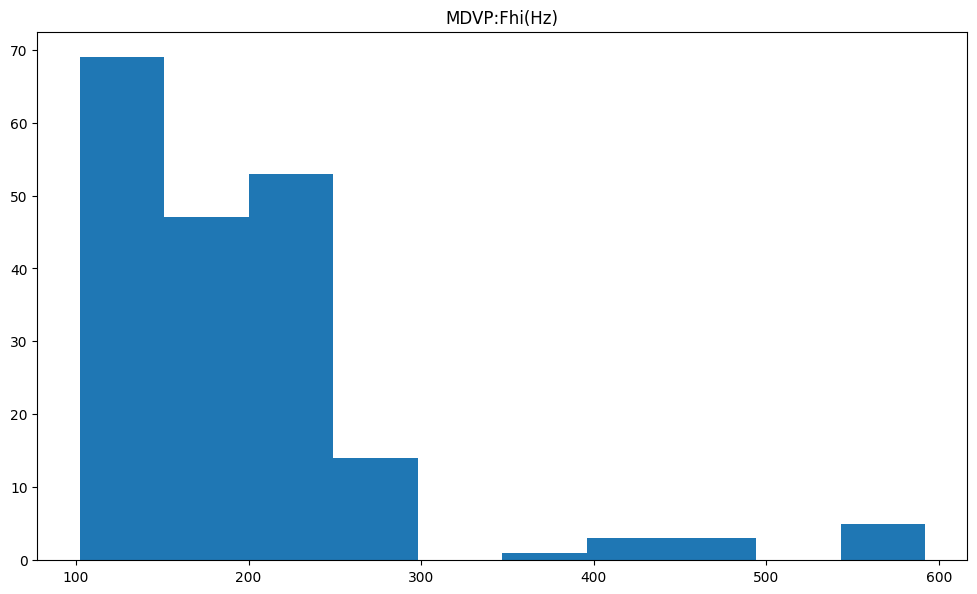

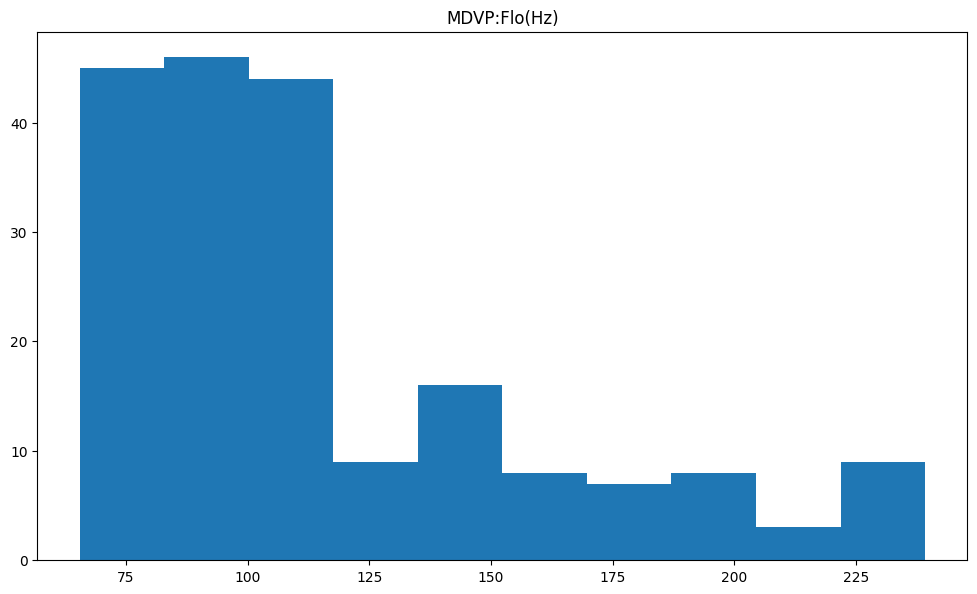

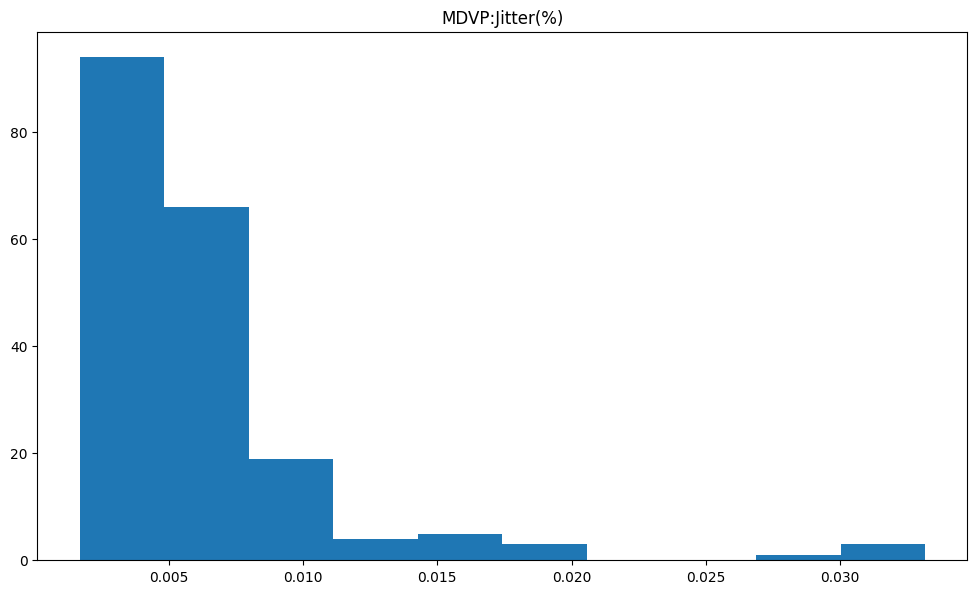

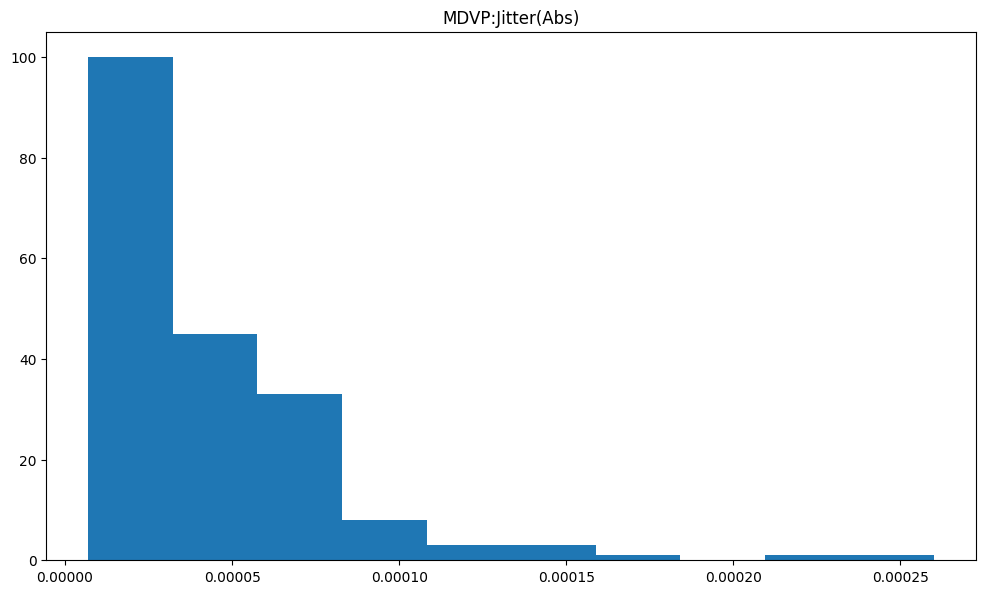

In [136]:
for col in data_X.columns[:5]:
  plt.hist(data_X[col])
  plt.title(col)
  plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [137]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=test_percent/100, random_state=random_state)
    return train_X, train_Y, test_X, test_Y
    
(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [138]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_X, train_data_Y)
    prediction = knn.predict(test_data_X)
    return metrics.accuracy_score(test_data_Y, prediction)

get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.7692307692307693

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [139]:
def standarize_train_and_test(train_X, test_X):
    #return preprocessing.StandardScaler().fit_transform(train_X), preprocessing.StandardScaler().fit_transform(test_X)
    #return preprocessing.MaxAbsScaler().fit_transform(train_X), preprocessing.MaxAbsScaler().fit_transform(test_X)
    return preprocessing.MinMaxScaler().fit_transform(train_X), preprocessing.MinMaxScaler().fit_transform(test_X)
    return train_X, test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.9230769230769231

# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

Best result: 0.9550403225806452
Best k: 1


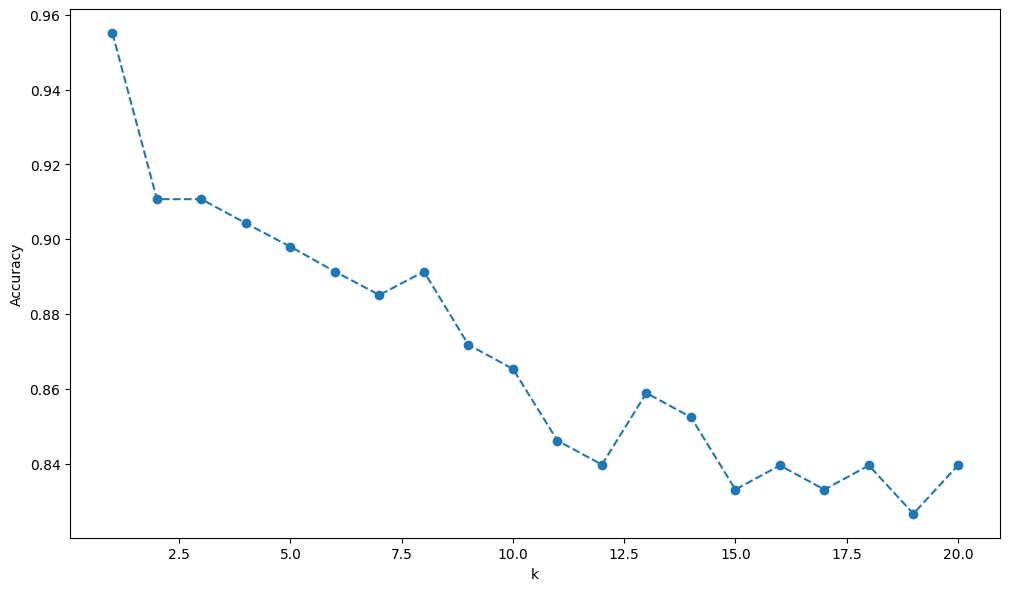

In [140]:
results = []
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)
  accuracy = cross_validate(knn, norm_train_X, train_Y, cv=5, scoring='accuracy')
  results.append(np.mean(accuracy['test_score']))
plt.plot(list(range(1,21)), results,  ls='--', marker='o');
plt.xlabel("k");
plt.ylabel("Accuracy");

k = results.index(max(results))+1
print("Best result:", results[k-1])
print("Best k:", k)

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [141]:
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=k)

0.9743589743589743

# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

###7.1 Wczytanie danych i selekcja odpowiednich kolumn

In [142]:
data = pd.read_csv("winequality-red.csv")
data_Y = data['quality']
data_X = data.drop(columns=['quality'])

###7.2 Wyświetlenie przykładowych wartości

In [143]:
data_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [144]:
data_Y

0         poor
1         poor
2         poor
3       medium
4         poor
         ...  
1594      poor
1595    medium
1596    medium
1597      poor
1598    medium
Name: quality, Length: 1599, dtype: object

In [145]:
data_X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [146]:
print("poor: " + str(list(data_Y).count("poor")))
print("medium: " + str(list(data_Y).count("medium")))
print("good: " + str(list(data_Y).count("good")))

poor: 744
medium: 638
good: 217


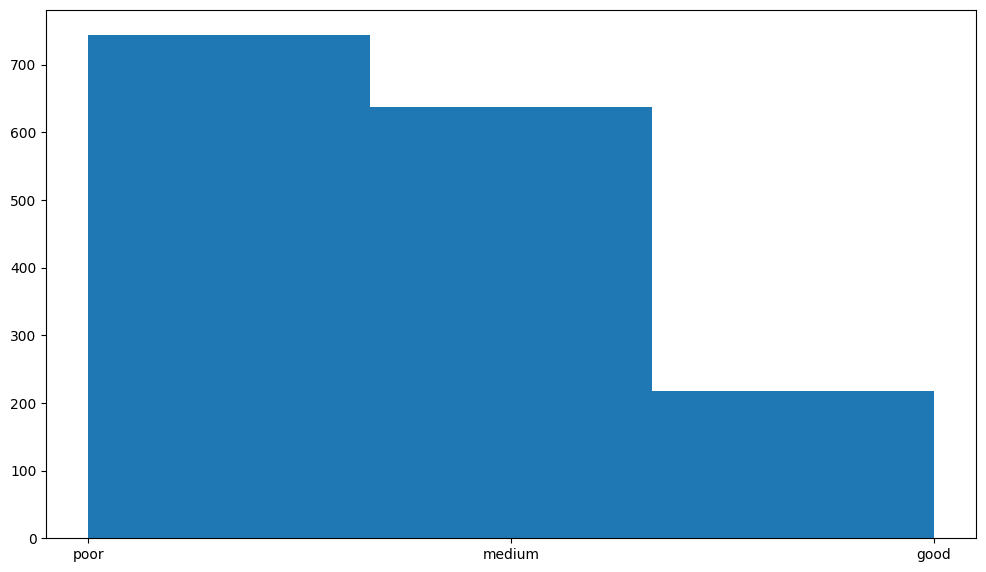

In [147]:
plt.hist(data_Y, bins = 3);

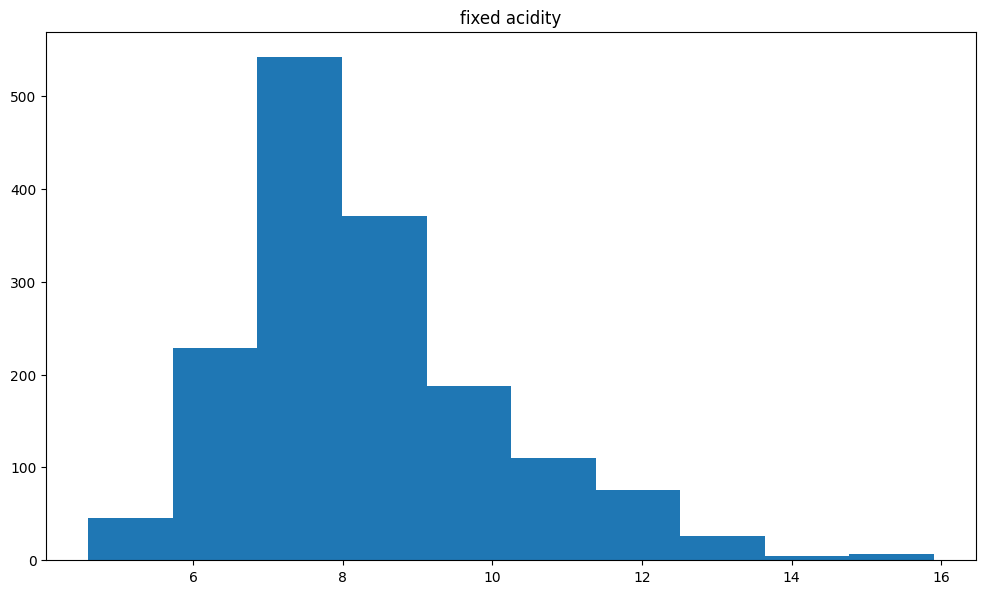

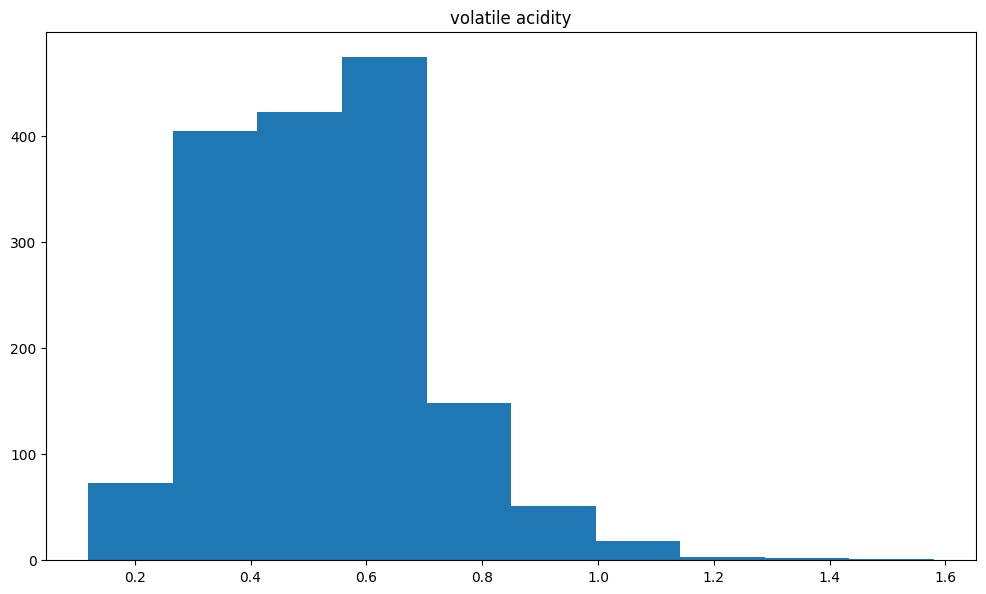

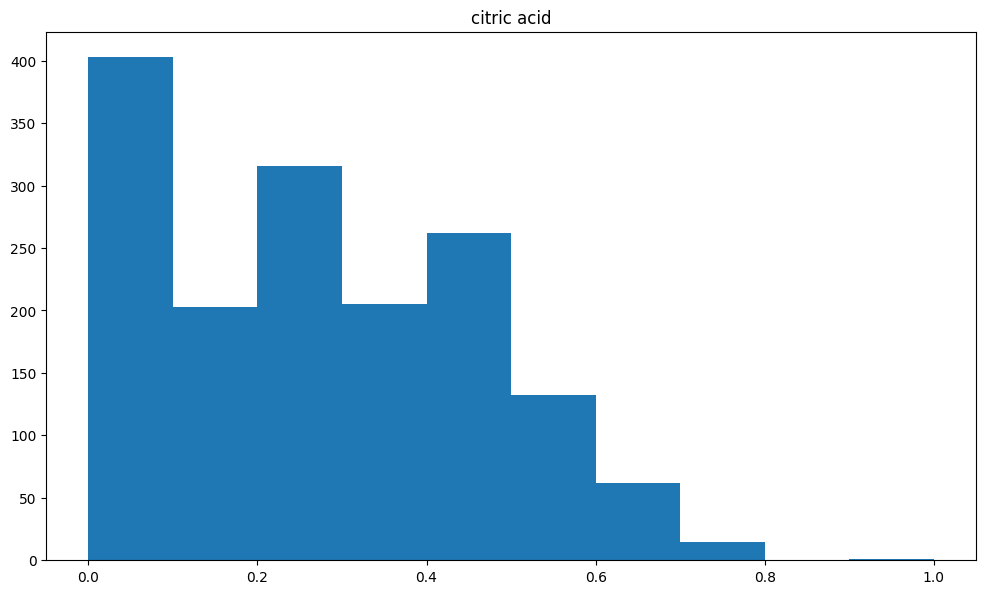

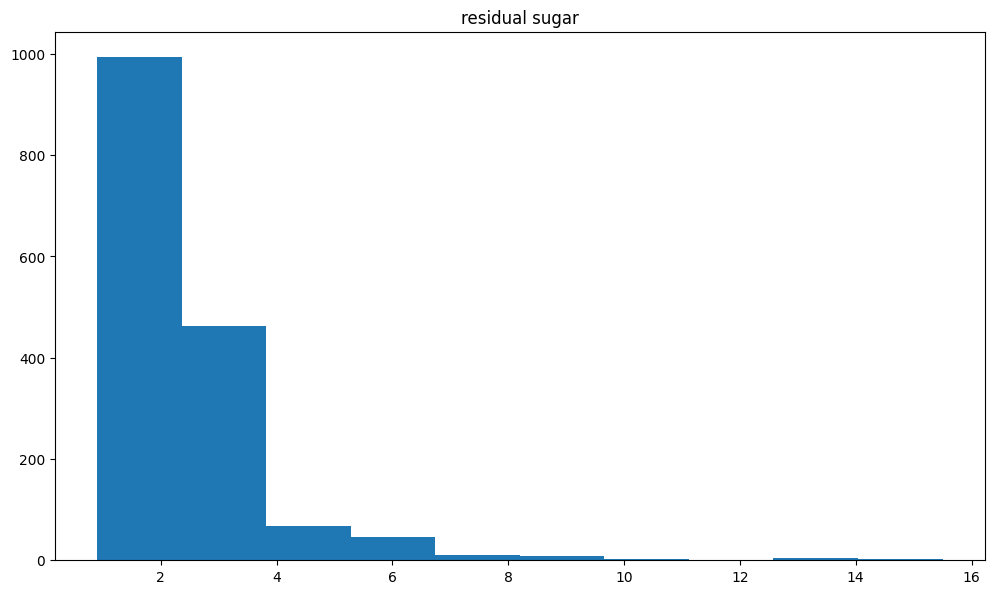

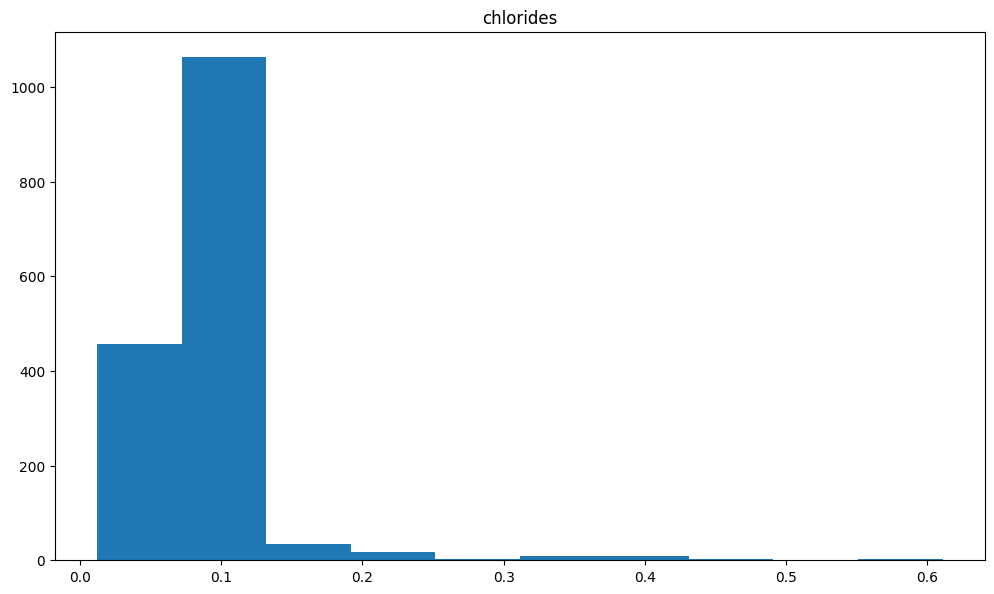

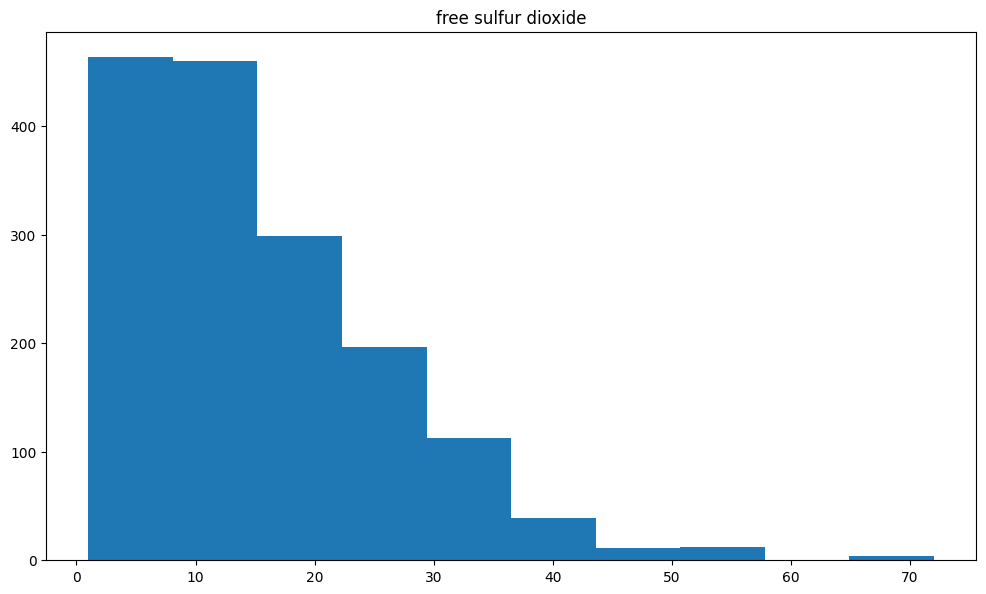

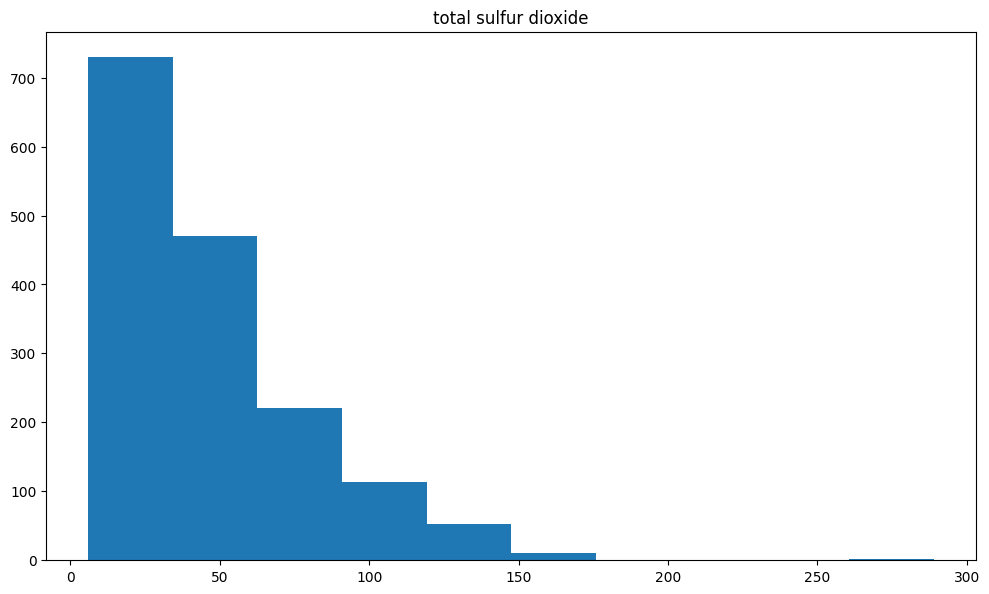

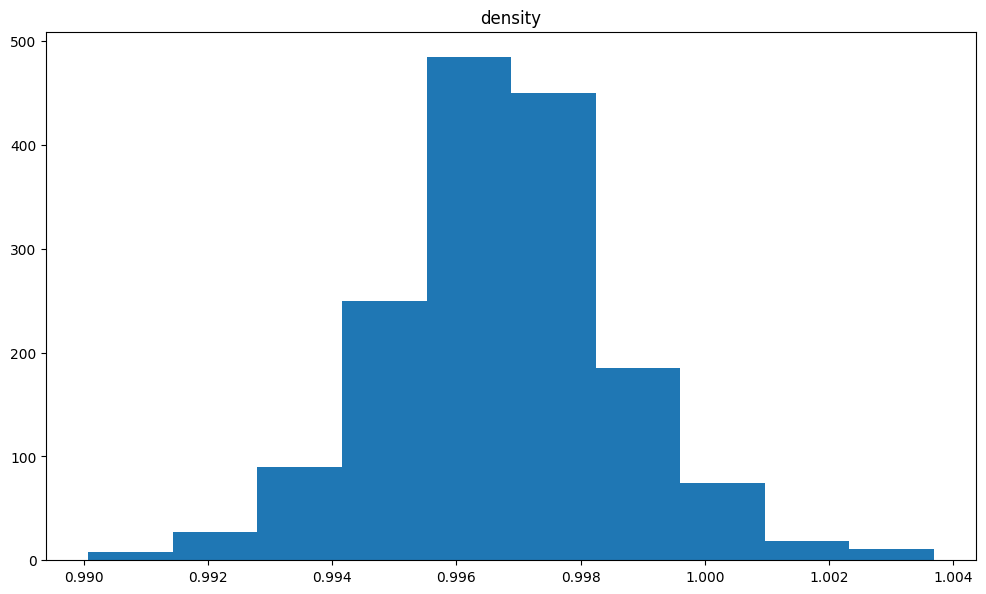

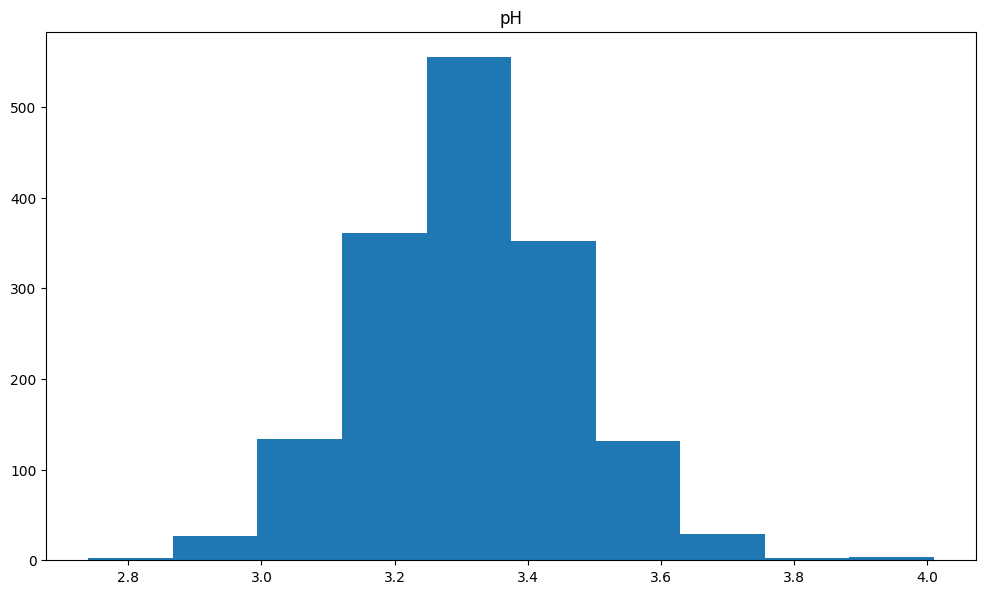

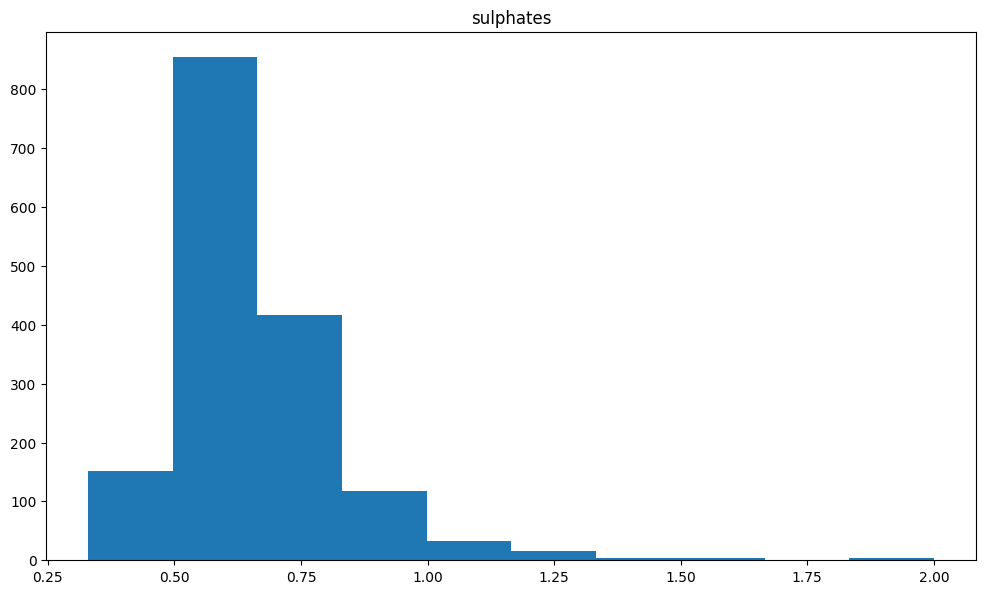

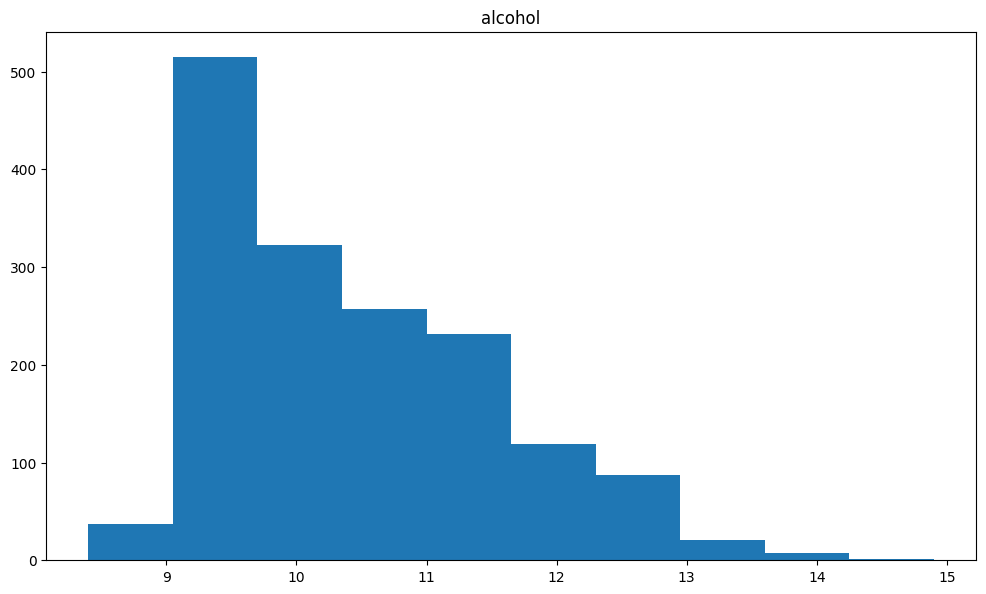

In [148]:
for col in data_X.columns:
  plt.hist(data_X[col])
  plt.title(col)
  plt.show()

###7.3 Podział danych na zbiory treningowe i testowe z wykorzystaniem stratification (warstwowania) i shuffling (tasowania)
#####- rozmiar zbioru testowego = 15%
#####- random_state = 1
#####- shuffle = True
#####- stratify = True

In [166]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.15, random_state=1, stratify=data_Y, shuffle=True)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  1359
rows in test set: 240


###7.4 Normalizacja i standaryzacja z wykorzystaniem StandardScaler().fit_transform()

In [167]:
def standarize_train_and_test(train_X, test_X):
    return preprocessing.StandardScaler().fit_transform(train_X), preprocessing.StandardScaler().fit_transform(test_X)
    #return preprocessing.MaxAbsScaler().fit_transform(train_X), preprocessing.MaxAbsScaler().fit_transform(test_X)
    #return preprocessing.MinMaxScaler().fit_transform(train_X), preprocessing.MinMaxScaler().fit_transform(test_X)
    return train_X, test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)

###7.5 Wybieranie najlepszej wartości parametru k dla klasyfikacji K-NN

Najlepsza wartość k = 1

In [168]:
results = []
for i in range(1, 21):
  wine_knn = KNeighborsClassifier(n_neighbors=i)
  accuracy = cross_validate(wine_knn, norm_train_X, train_Y, cv=5, scoring='accuracy')
  results.append(np.mean(accuracy['test_score']))
k = results.index(max(results))+1
print("Best result:", results[k-1])
print("Best k: ", k)

Best result: 0.6504802474495334
Best k:  1


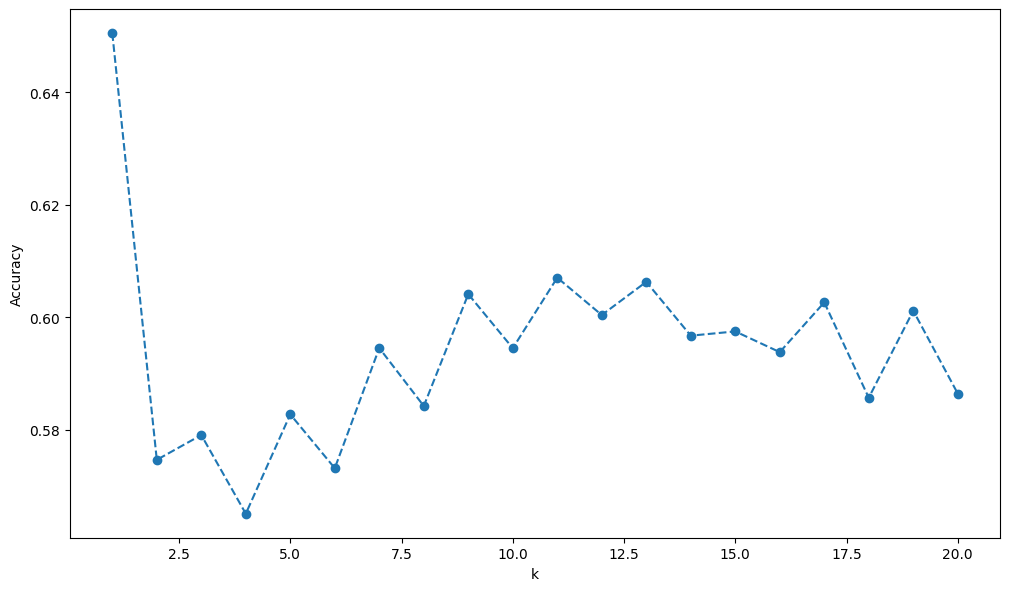

In [169]:
plt.rc('figure', figsize=(12, 7), dpi=100)
plt.plot(list(range(1,21)), results, ls='--', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

###7.6 Klasyfikacja K-NN z najlepszą wartością parametru k

In [170]:
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=k)

0.7416666666666667

###7.7 Inne warianty i ich wyniki:
####7.7.1:
#####- rozmiar zbioru testowego = 10%
#####- random_state = 1
#####- shuffle = True
#####- stratify = True
#####- accuracy = 0.7438
####7.7.2:
#####- rozmiar zbioru testowego = 15%
#####- random_state = 9
#####- shuffle = True
#####- stratify = True
#####- accuracy = 0.7291
####7.7.3:
#####- rozmiar zbioru testowego = 15%
#####- random_state = 8
#####- shuffle = True
#####- stratify = True
#####- accuracy = 0.7083
####7.7.4:
#####- rozmiar zbioru testowego = 20%
#####- random_state = 1
#####- shuffle = True
#####- stratify = True
#####- accuracy = 0.7125
####7.7.5:
#####- rozmiar zbioru testowego = 25%
#####- random_state = 7
#####- shuffle = True
#####- stratify = True
#####- accuracy = 0.7025